<a href="https://colab.research.google.com/github/MuhTaufikAziz/202155202052-Muh_Taufik_Aziz/blob/main/Klasifikasi_JenisGitar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/gitar

In [ ]:
cp /content/drive/MyDrive/DL/archive1.zip /content/gitar

In [ ]:
!unzip /content/gitar/archive1.zip

Archive:  /content/gitar/archive1.zip
  inflating: TUGAS6/Gitar Akustik/20230501_150811.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_150923.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_150932.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151014.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151149.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151154.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151202.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151216.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151236.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151241.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151256.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151412.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151417.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151434.jpg  
  inflating: TUGAS6/Gitar Akustik/20230501_151443.jpg  
  inflating: TUGAS6/Gitar Akustik/322861896_5920971171344029_2569415398429087005_n.jpg  
  inflating: TUGAS6/Gitar Akustik

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model

In [ ]:
dataset_path = Path(r'/content/TUGAS6')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [ ]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/TUGAS6/Gitar Listrik/IMG_168308379316...,Gitar Listrik
1,/content/TUGAS6/Gitar Listrik/20230501_151438.jpg,Gitar Listrik
2,/content/TUGAS6/Gitar Listrik/IMG_168294847557...,Gitar Listrik
3,/content/TUGAS6/Gitar Listrik/343536842_504995...,Gitar Listrik
4,/content/TUGAS6/Gitar Listrik/IMG_20230503_122...,Gitar Listrik


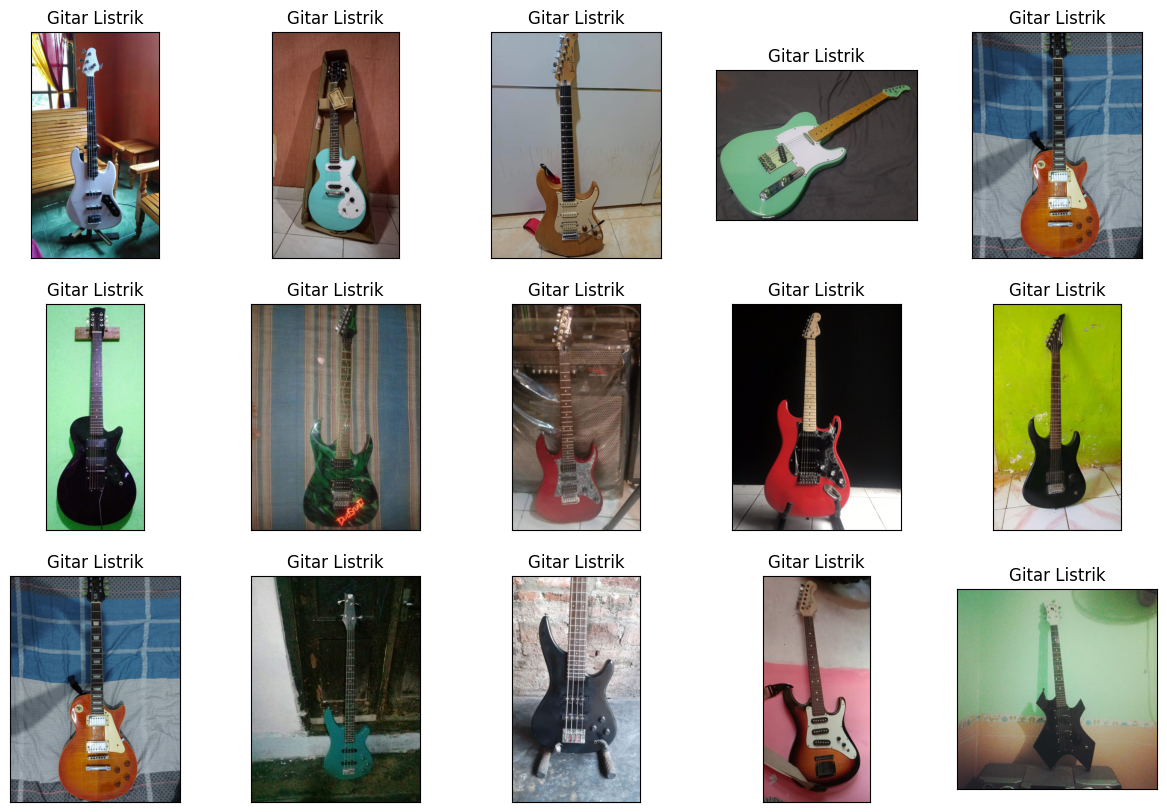

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [ ]:
df.label.value_counts()

Gitar Akustik    55
Gitar Listrik    49
Gitar Biasa      40
Name: label, dtype: int64

In [ ]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Gitar Akustik    55
Gitar Listrik    49
Gitar Biasa      40
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [ ]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (80, 2)
Shape of test data (44, 2)
Shape of validation data (20, 2)


In [ ]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)
     

Found 80 validated image filenames belonging to 3 classes.
Found 44 validated image filenames belonging to 3 classes.
Found 20 validated image filenames belonging to 3 classes.


In [ ]:
input_shape = (200, 200, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)      

In [ ]:
import tensorflow as tf

# Define the training and validation data
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()
train = x_train.reshape(60000, 784).astype('float32') / 255.0
val = x_val.reshape(10000, 784).astype('float32') / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=784),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model with the chosen optimizer, loss function and metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

# Define the callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# Train the model
history = model.fit(train, validation_data=val, epochs=5, callbacks=callback)

In [ ]:
model.save('model-1.h5')

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: ignored

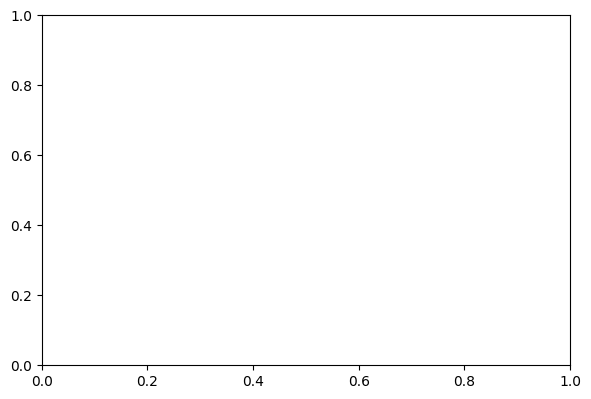

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [ ]:
pred = model.predict(test)

2/2 [==============================] - 2s 214ms/step


In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
labels = train.class_indices

In [ ]:
labels

{'Gitar Akustik': 0, 'Gitar Biasa': 1, 'Gitar Listrik': 2}

In [ ]:
labels = dict((v,k) for k, v in labels.items())

In [ ]:
labels

{0: 'Gitar Akustik', 1: 'Gitar Biasa', 2: 'Gitar Listrik'}

In [ ]:
y_pred = [labels[k] for k in pred]

KeyError: ignored

In [ ]:
print(classification_report(x_test.label, y_pred))

NameError: ignored